In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

sns.set()

""" All the terms defined such as effective lr are from the paper
    A Quantitative Analysis of the Effect of Batch Normalization on Gradient Descent
    https://arxiv.org/abs/1810.00122"""
seed = 2179
np.random.seed(seed)
#condition number
kappa = 10
#supports only d=2 or d=3
d = 2
#minimum_eigenvalue
min_eig = 1
#norm of the u vector
u_norm = 1

In [20]:
#Hessian matrix
H = np.diag(np.linspace(min_eig, kappa*min_eig, d))
u = np.random.randn(d, 1)
u = u_norm*u/np.linalg.norm(u)
g = np.matmul(H, u)
#H* matrix
H2 = H - np.matmul(g, g.transpose())/(np.matmul(u.transpose(), np.matmul(H, u)))
eigs,_ = np.linalg.eigh(H2)
w = np.random.randn(d,1)
w = w/np.linalg.norm(w)
w_lr = 0.01
a_lr = 0.01
a = 1
effective_lr = []
#perpendicular component of u w.r.t w(measured along H)
perp = []
if d==2:
    norm_w_s = [[], []]
    norm_w2_s = [[], []]
    w_s = [[], []]
    w2_s = [[], []]
if d==3:
    norm_w_s = [[], [], []]
    norm_w2_s = [[], [], []]
    w_s = [[], [], []]
    w2_s = [[], [], []]
a_s = []
#residual for BN
res_BN = []
#residual for GD
res_GD = []
w2 = w/np.sqrt(np.matmul(w.transpose(), np.matmul(H, w))[0,0])
lr = 2/(kappa+min_eig)

#normal GD
while(True):
    res_GD.append(np.linalg.norm(u - w2))
    if d==2:
        norm_w2_s[0].append((w2/np.linalg.norm(w2))[0,0])
        norm_w2_s[1].append((w2 / np.linalg.norm(w2))[1,0])
        w2_s[0].append((w2)[0, 0])
        w2_s[1].append((w2)[1, 0])
    if d==3:
        norm_w2_s[0].append((w2/np.linalg.norm(w2))[0,0])
        norm_w2_s[1].append((w2 / np.linalg.norm(w2))[1,0])
        norm_w2_s[2].append((w2 / np.linalg.norm(w2))[2, 0])
        w2_s[0].append((w2)[0, 0])
        w2_s[1].append((w2)[1, 0])
        w2_s[2].append((w2)[2, 0])
    w2 = w2 + lr*(np.matmul(H, u) - np.matmul(H, w2))
    if np.linalg.norm(u - w2) < 1e-3:
        break

#Batch-normalization
while(True):
    w_H_w = np.matmul(w.transpose(), np.matmul(H, w))[0,0]
    w_H_u = np.matmul(w.transpose(), np.matmul(H, u))[0,0]
    effective_lr.append(w_lr*a*w_H_u/(w_H_w**(1.5)))
    if d==2:
        norm_w_s[0].append((w/np.linalg.norm(w))[0,0])
        norm_w_s[1].append((w / np.linalg.norm(w))[1,0])
        w_s[0].append(((a/np.sqrt(w_H_w))*w)[0, 0])
        w_s[1].append(((a/np.sqrt(w_H_w))*w)[1, 0])
    if d==3:
        norm_w_s[0].append((w/np.linalg.norm(w))[0,0])
        norm_w_s[1].append((w / np.linalg.norm(w))[1,0])
        norm_w_s[2].append((w / np.linalg.norm(w))[2, 0])
        w_s[0].append(((a/np.sqrt(w_H_w))*w)[0, 0])
        w_s[1].append(((a/np.sqrt(w_H_w))*w)[1, 0])
        w_s[2].append(((a / np.sqrt(w_H_w)) * w)[2, 0])
    e_k = u - (w_H_u/w_H_w)*w
    a_s.append(a)
    perp.append(np.linalg.norm(u - (w_H_u/w_H_w)*w))
    res_BN.append(np.linalg.norm(u - (a/(w_H_w**(0.5)))*w))
    a = a + a_lr*(w_H_u/np.sqrt(w_H_w) - a)
    w = w + w_lr*(a/np.sqrt(w_H_w))*(np.matmul(H, u) - (w_H_u/w_H_w)*np.matmul(H, w))

    if np.linalg.norm(u - (a/(w_H_w**(0.5)))*w) < 1e-3:
        break

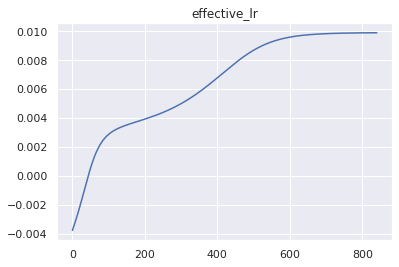

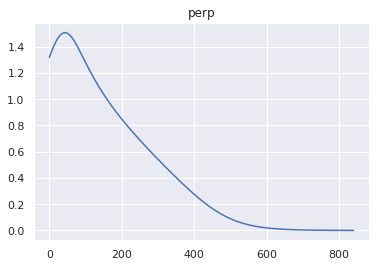

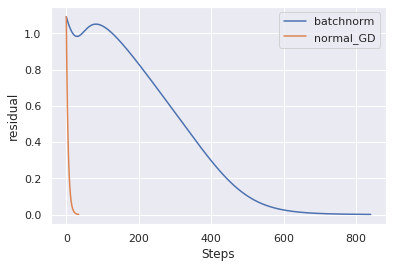

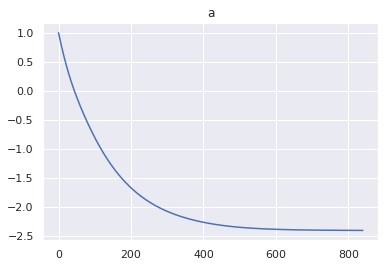

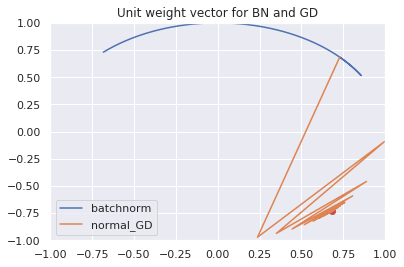

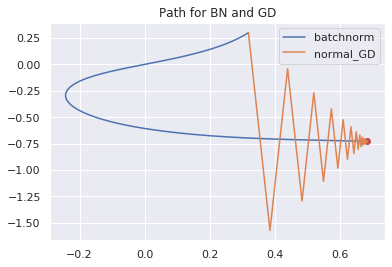

In [21]:
plt.plot(np.arange(len(effective_lr)), effective_lr)
plt.title('effective_lr')
plt.show()

plt.plot(np.arange(len(perp)), perp)
plt.title('perp')
plt.show()

plt.plot(np.arange(len(res_BN)), res_BN, label = 'batchnorm')
plt.plot(np.arange(len(res_GD)), res_GD, label = 'normal_GD')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('residual')
plt.show()

plt.plot(np.arange(len(a_s)), a_s)
plt.title('a')
plt.show()


if d==2:
    style = dict(size=10, color='gray')
    l = len(norm_w_s[0])-1
    l2 = len(norm_w2_s[0])-1
    plt.plot(norm_w_s[0], norm_w_s[1], label = 'batchnorm')
    plt.plot(norm_w2_s[0], norm_w2_s[1], label='normal_GD')
    plt.scatter(u[0], u[1], c='r')
    plt.legend()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title('Unit weight vector for BN and GD')
    plt.show()

    plt.plot(w_s[0], w_s[1], label='batchnorm')
    plt.plot(w2_s[0], w2_s[1], label='normal_GD')
    plt.scatter(u[0], u[1], c='r')
    plt.legend()
    plt.title('Path for BN and GD')
    plt.show()

if d==3:
    style = dict(size=10, color='gray')
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    l = len(norm_w_s[0])
    l2 = len(norm_w2_s[0])
    ax.plot3D(norm_w_s[0], norm_w_s[1], norm_w_s[2], label='batchnorm')
    ax.plot3D(norm_w2_s[0], norm_w2_s[1], norm_w2_s[2], label = 'normal_GD')
    ax.scatter3D(u[0], u[1], u[2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    plt.legend()
    plt.title('Unit weight vector for BN and GD')
    plt.show()

    ax2 = plt.axes(projection='3d')
    ax2.plot3D(w_s[0], w_s[1], w_s[2], label='batchnorm')
    ax2.plot3D(w2_s[0], w2_s[1], w2_s[2], label='normal-GD')
    ax2.scatter3D(u[0], u[1], u[2])
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    plt.legend()
    plt.title('Path for BN and GD')
    plt.show()
